# Лабораторная работа №2 «Неявные методы Рунге-Кутты»

## Дашкевич Артём Владимирович
## Вариант 2

### Скрин постановки задачи:
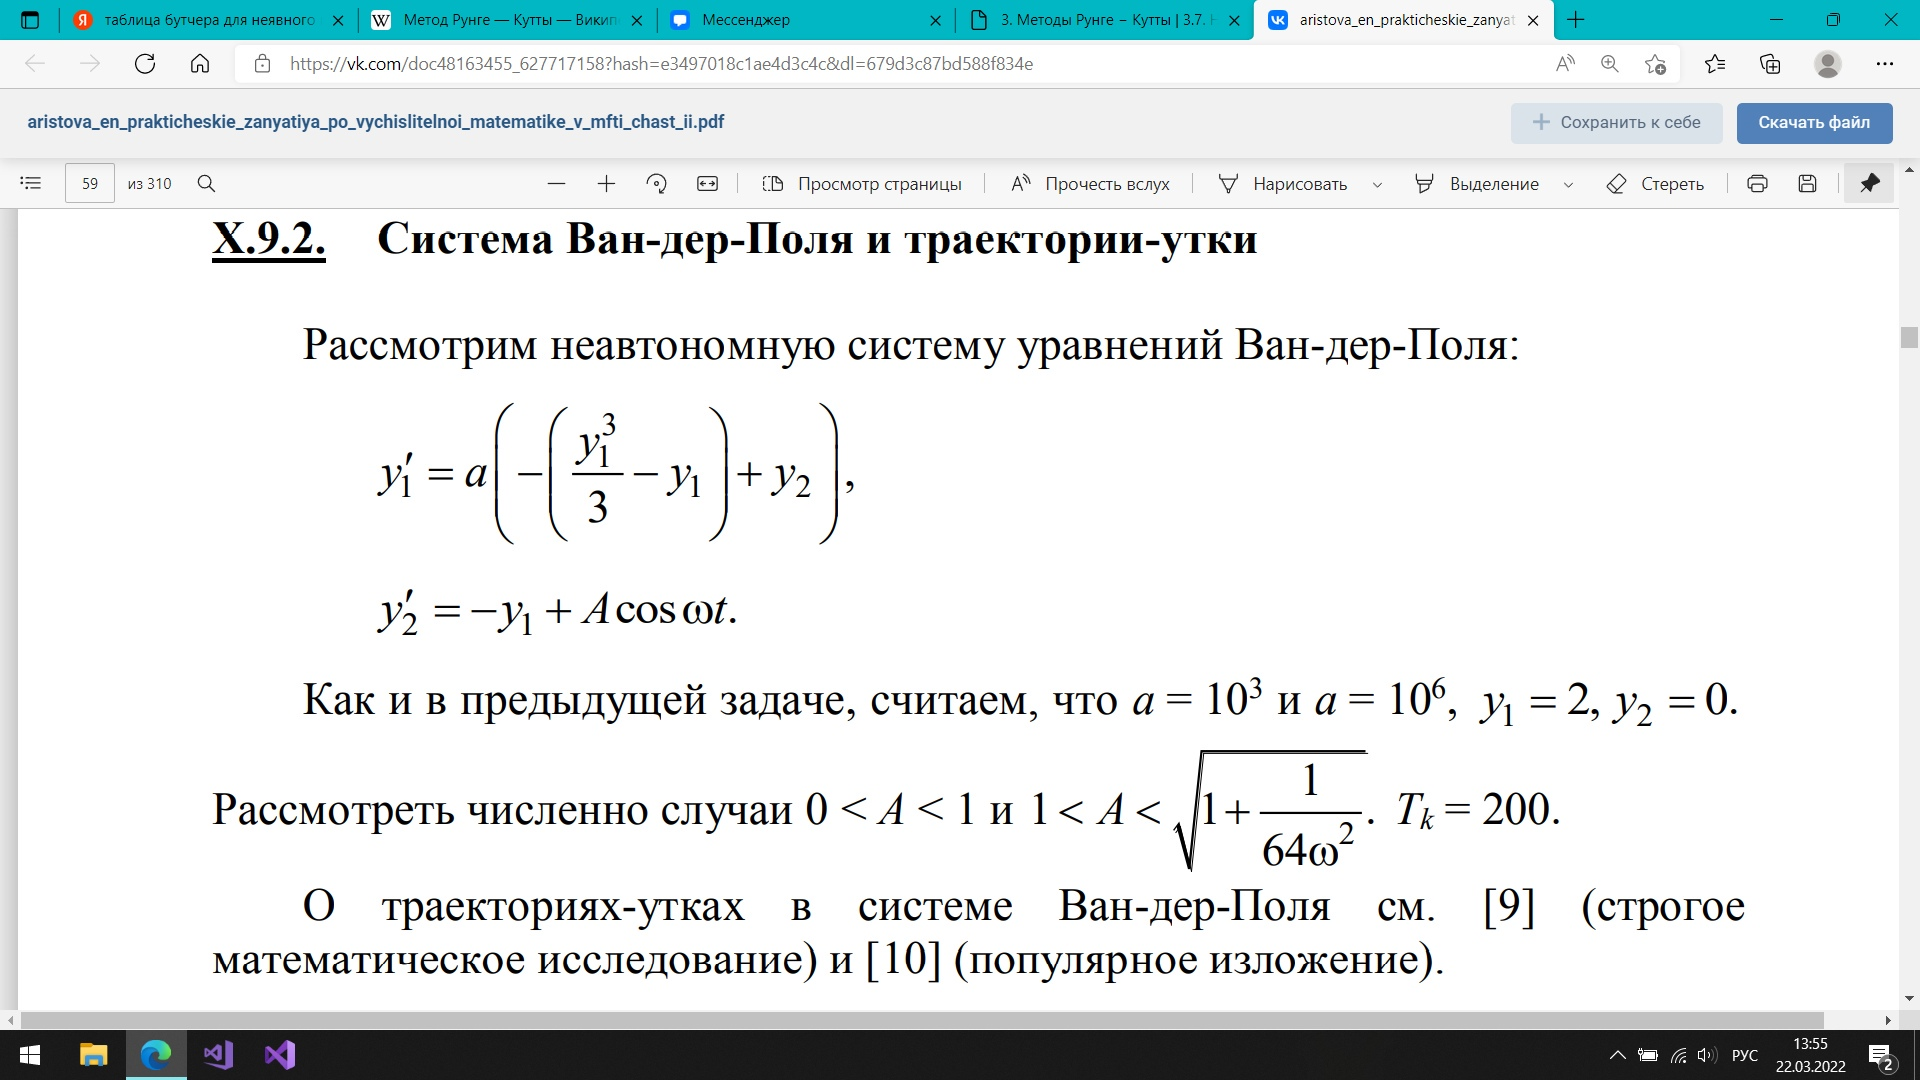

### Описание метода:   
в ходе данной работы исследуется решение системы Ван-Дер-Поля с помощью неявного метода Рунге-Кутты (метода Эйлера с пересчётом 2 порядка). Общая схема рассчёта значения на следующем шаге:   
   
y_n+1 = y_n + h * (f(x_n, y_n) + f(x_n+1, y_n+1)) / 2   
   
Для упрощения реализации разделим каждую итерацию на 2 части:   
1) Прогноз:    
>y_n+1_iter = y_n + h * f(x_n, y_n)    

2) Коррекция (выполняется итеративно c заменой y_n+1_iter на y_n+1):
>y_n+1 = y_n + h * (f(x_n, y_n) + f(x_n+1, y_n+1_iter)) / 2   


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [41]:
y1_0 = 2
y2_0 = 0
a = 10 ** 3      # all tests were carried out for a = 10^3, since non-computable values are obtained for 10^6
max_time = 20    # 20 seconds is enough for a full cycle

In [42]:
def regulate_size(new_size):
    time_array = [0] * new_size
    for i in range(new_size):
        time_array[i] = h * i

    y1 = [0] * size
    y1[0] = y1_0

    y2 = [0] * size
    y2[0] = y2_0
    
    return time_array, y1, y2

In [43]:
# Components of function f

def f_1(t, y1, y2):
    return a * (-(y1 ** 3 / 3 - y1) + y2)

def f_2(t, y1, y2):
    return - y1 + A * math.cos(w * t)

In [44]:
def norm(x, y):
    return math.sqrt(x ** 2 + y ** 2)

def prediction(t, y1, y2, f_1, f_2, h):
    y1_next_it = y1 + h * f_1(t, y1, y2)
    y2_next_it = y2 + h * f_2(t, y1, y2)
    return y1_next_it, y2_next_it

def correction(t, y1, y2, t_next, y1_next_it, y2_next_it, f_1, f_2, h):
    y1_next = y1 + h * (f_1(t, y1, y2) + f_1(t_next, y1_next_it, y2_next_it)) / 2
    y2_next = y2 + h * (f_2(t, y1, y2) + f_2(t_next, y1_next_it, y2_next_it)) / 2
    return y1_next, y2_next

# The "Accuracy" parameter is used to set the breakpoint of the iterative correction pass

def find_next_step(t, y1, y2, t_next, f_1, f_2, h, accuracy):
    y1_next_it, y2_next_it = prediction(t, y1, y2, f_1, f_2, h)
    
    y1_next, y2_next = correction(t, y1, y2, t_next, y1_next_it, y2_next_it, f_1, f_2, h)

    #Stop if the norm of the difference of 2 subsequent iterations turns out to be less than the accuracy
    while norm(y1_next - y1_next_it, y2_next - y2_next_it) > accuracy:
        y1_next_it = y1_next
        y2_next_it = y2_next
        y1_next, y2_next = correction(t, y1, y2, t_next, y1_next_it, y2_next_it, f_1, f_2, h)
    
    return y1_next, y2_next

Проварьируем параметры для исследования и построим графики зависимостей компонент y1 = f(t) и y2 = f(t), а также фазовые траектории y2 = f(y1)

Для w = {1, 10, 100}, при A = 0.5:

In [47]:
h = 0.0001
size = int(max_time / h + 1)
time_array, y1, y2 = regulate_size(size)

w =  1


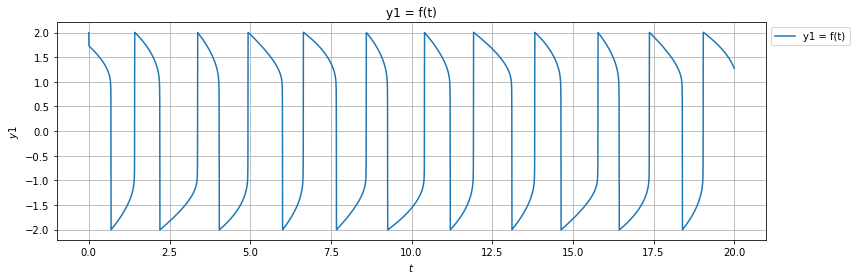

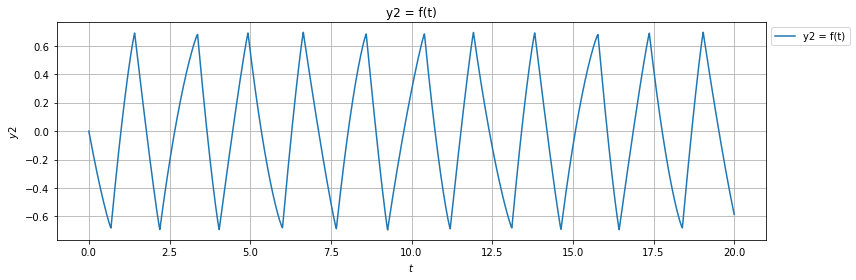

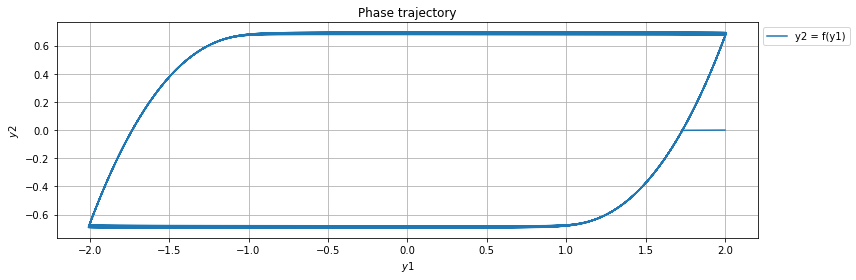

w =  10


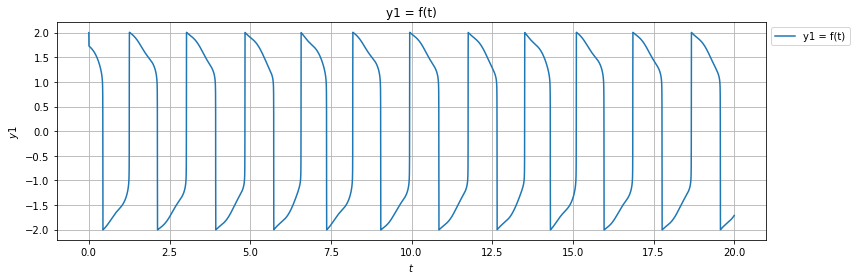

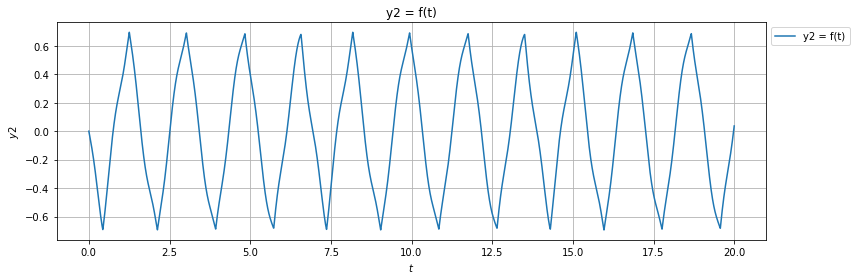

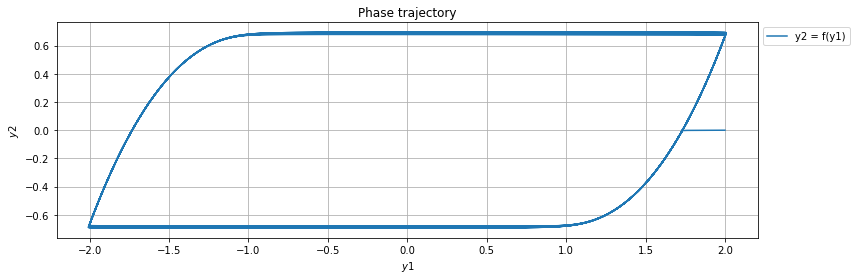

w =  100


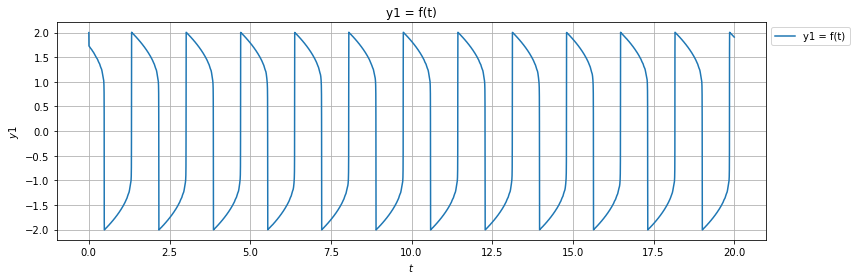

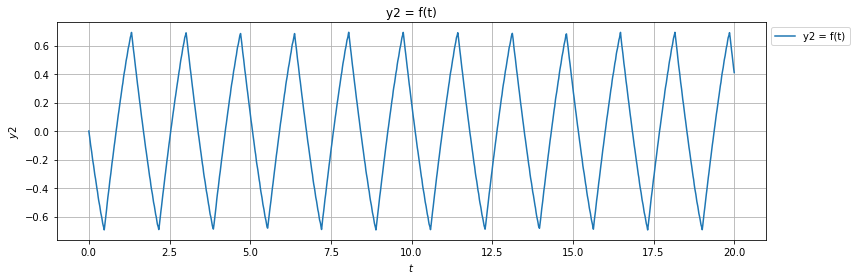

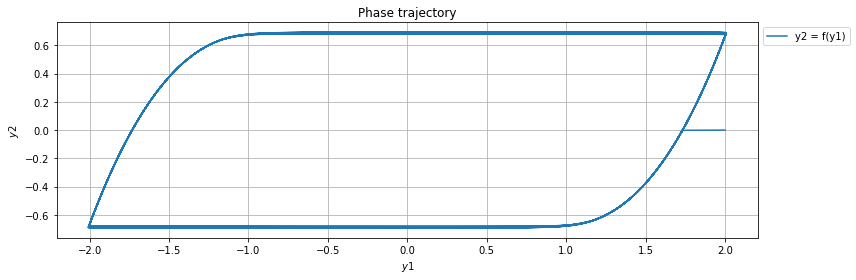

In [48]:
A = 0.5

for degree in range(3):
    
    w = 10 ** degree
    print("w = ", w)
    
    for i in range(size - 1):
        y1[i + 1], y2[i + 1] = find_next_step(time_array[i], y1[i], y2[i], time_array[i + 1], f_1, f_2, h, 0.001)

    # y1 = f(t)
    plt.figure(figsize=[12, 4])
    plt.plot(time_array, y1, label='y1 = f(t)')

    plt.title("y1 = f(t)")
    plt.xlabel("$t$")
    plt.ylabel("$y1$")
    plt.grid()
    plt.legend(loc='best', bbox_to_anchor=(1, 1))
    plt.tight_layout() 
    plt.show()

    # y2 = f(t)
    plt.figure(figsize=[12, 4])
    plt.plot(time_array, y2, label='y2 = f(t)')

    plt.title("y2 = f(t)")
    plt.xlabel("$t$")
    plt.ylabel("$y2$")
    plt.grid()
    plt.legend(loc='best', bbox_to_anchor=(1, 1))
    plt.tight_layout() 
    plt.show()

    # y2 = f(y1)
    plt.figure(figsize=[12, 4])
    plt.plot(y1, y2, label='y2 = f(y1)')

    plt.title("Phase trajectory")
    plt.xlabel("$y1$")
    plt.ylabel("$y2$")
    plt.grid()
    plt.legend(loc='best', bbox_to_anchor=(1, 1))
    plt.tight_layout() 
    plt.show()

Для A = {0.01, 0.1, 1, 10}, при w = 10:

A =  0.01


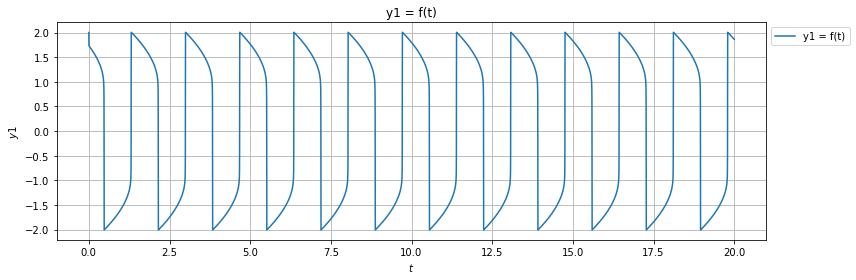

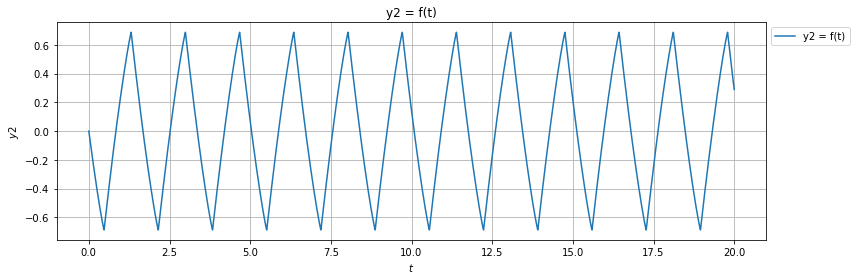

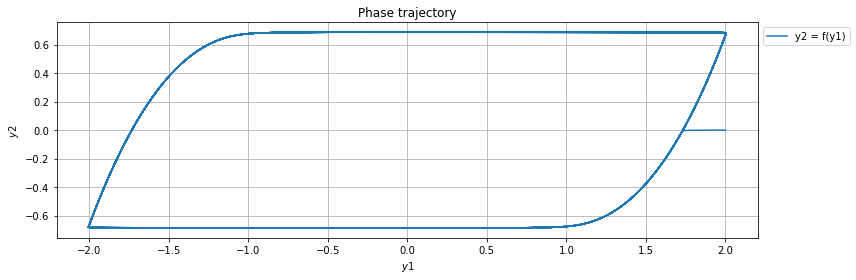

A =  0.1


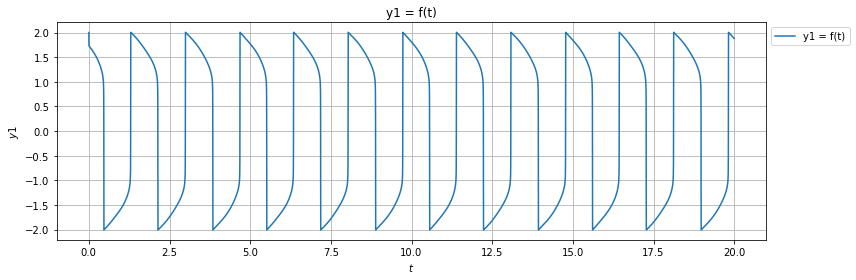

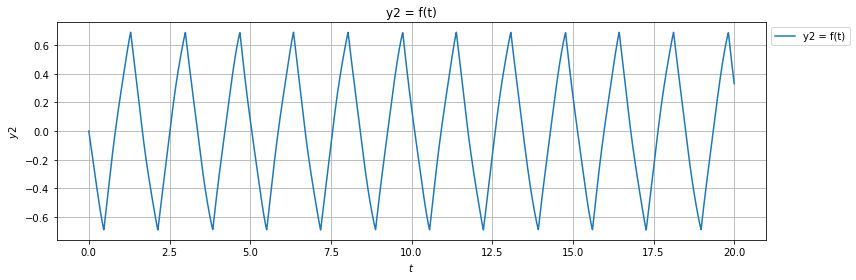

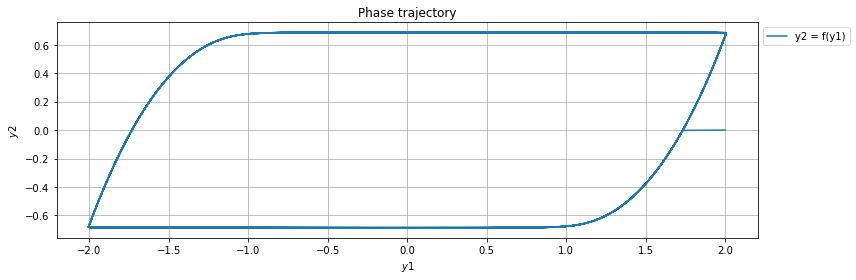

A =  1


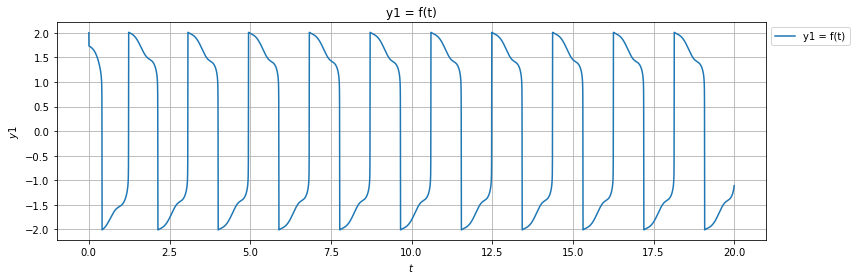

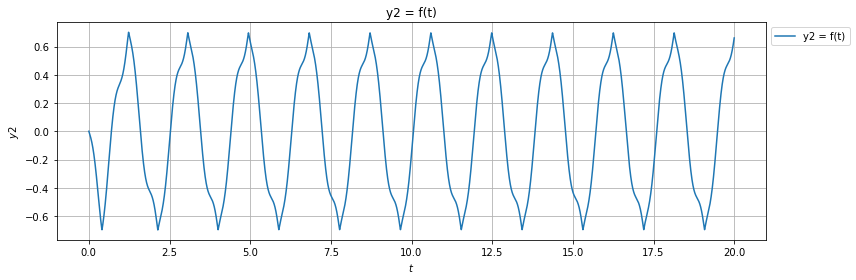

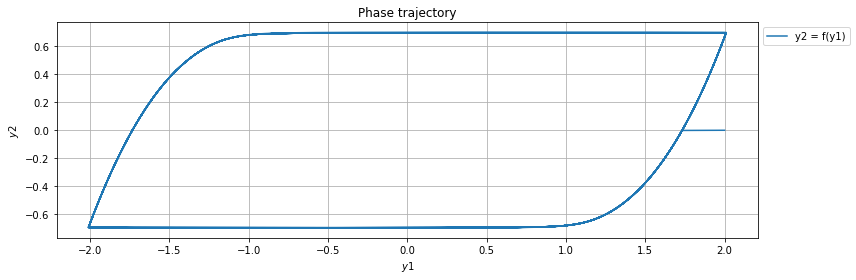

A =  10


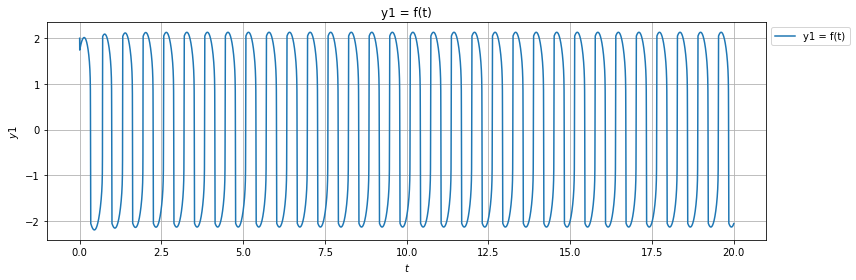

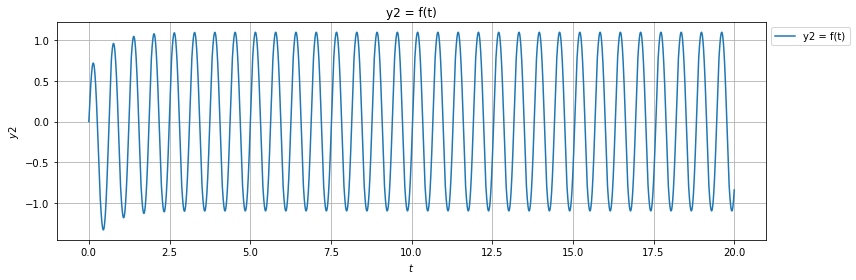

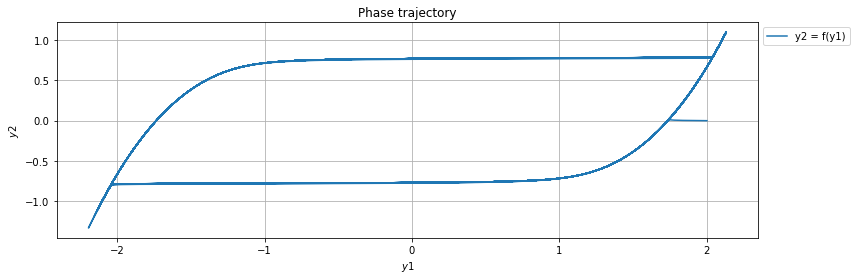

In [49]:
w = 10

for degree in range(-2, 2):
    
    A = 10 ** degree
    print("A = ", A)
    
    for i in range(size - 1):
        y1[i + 1], y2[i + 1] = find_next_step(time_array[i], y1[i], y2[i], time_array[i + 1], f_1, f_2, h, 0.001)

    # y1 = f(t)
    plt.figure(figsize=[12, 4])
    plt.plot(time_array, y1, label='y1 = f(t)')

    plt.title("y1 = f(t)")
    plt.xlabel("$t$")
    plt.ylabel("$y1$")
    plt.grid()
    plt.legend(loc='best', bbox_to_anchor=(1, 1))
    plt.tight_layout() 
    plt.show()

    # y2 = f(t)
    plt.figure(figsize=[12, 4])
    plt.plot(time_array, y2, label='y2 = f(t)')

    plt.title("y2 = f(t)")
    plt.xlabel("$t$")
    plt.ylabel("$y2$")
    plt.grid()
    plt.legend(loc='best', bbox_to_anchor=(1, 1))
    plt.tight_layout() 
    plt.show()

    # y2 = f(y1)
    plt.figure(figsize=[12, 4])
    plt.plot(y1, y2, label='y2 = f(y1)')

    plt.title("Phase trajectory")
    plt.xlabel("$y1$")
    plt.ylabel("$y2$")
    plt.grid()
    plt.legend(loc='best', bbox_to_anchor=(1, 1))
    plt.tight_layout() 
    plt.show()

Отдельно рассмотрим случай A = sqrt(1 + 1/(64*w^2)) при w = 100:

A =  1.000000781249695


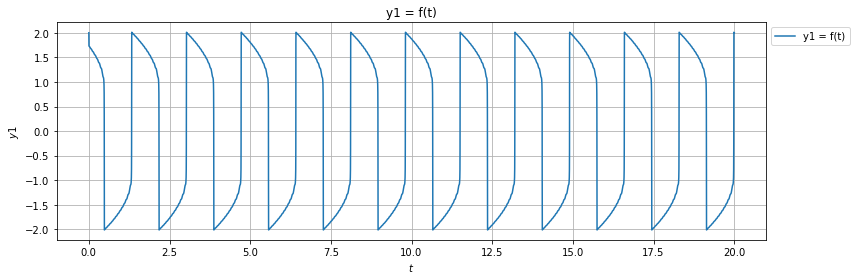

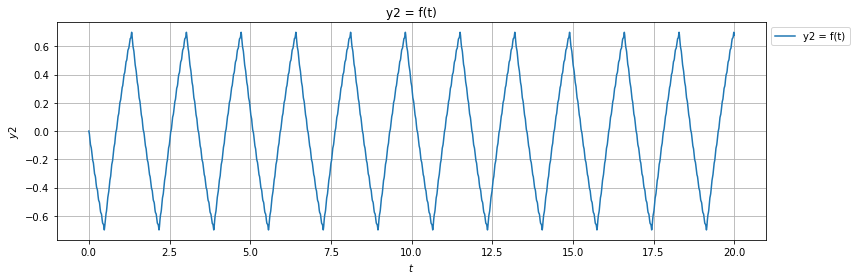

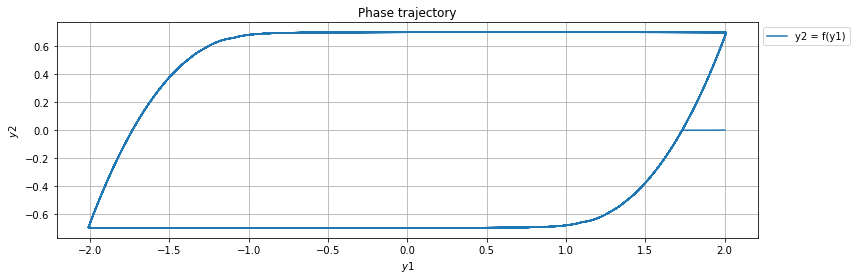

In [53]:
w = 100
A = math.sqrt(1 + 1 / (64 * w ** 2))

print("A = ", A)
    
for i in range(size - 1):
    y1[i + 1], y2[i + 1] = find_next_step(time_array[i], y1[i], y2[i], time_array[i + 1], f_1, f_2, h, 0.001)

# y1 = f(t)
plt.figure(figsize=[12, 4])
plt.plot(time_array, y1, label='y1 = f(t)')

plt.title("y1 = f(t)")
plt.xlabel("$t$")
plt.ylabel("$y1$")
plt.grid()
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout() 
plt.show()

# y2 = f(t)
plt.figure(figsize=[12, 4])
plt.plot(time_array, y2, label='y2 = f(t)')

plt.title("y2 = f(t)")
plt.xlabel("$t$")
plt.ylabel("$y2$")
plt.grid()
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout() 
plt.show()

# y2 = f(y1)
plt.figure(figsize=[12, 4])
plt.plot(y1, y2, label='y2 = f(y1)')

plt.title("Phase trajectory")
plt.xlabel("$y1$")
plt.ylabel("$y2$")
plt.grid()
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout() 
plt.show()

Можно заметить, что при увеличении параметра w линии становятся ровнее и графики компонент от времени всё более напоминают клюв утки (см y1 = f(t)). При переходе амплитуды через 1 меняется форма графиков, появляются дополнительные пики. При больших A ~ 10 также существенно меняется период решения. Фазовые траектории представляют из себя циклы, что говорит о периодичности решений. Случай с a = 10^6 рассмотреть не удалось в силу ограничений интервала значений в типе данных для python.